# Logistic Regression

Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification (a case with only two categories). It is easy to implement and can be used as the baseline for any binary classification problem (either: 0 or 1, Yes or No, On or Off).

In this project we will be working with an diabetes data set. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score,classification_report,roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
# load datasets
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

**There are 768 patients with 9 entries.**

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Retreiving values with 0 entries
data[data==0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Pregnancies variable include 0 value but its not missing value this mean she have never been pregnant so we don't change this, 
Glucose, BloodPressure, SkinThickness, Insulin, BMI has include missing values. Lets get fill this values

In [10]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness',
                                                                      'Insulin','BMI']].replace(0, np.NaN)

In [11]:
# Filling the missing values with median values
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [12]:
cols = data.columns
cols = cols.drop('Outcome')

for col in cols:
    median_target(col)
    
    data.loc[(data['Outcome'] == 0) & (data[col].isnull()), col] = median_target(col)[col][0]
    data.loc[(data['Outcome'] == 1) & (data[col].isnull()), col] = median_target(col)[col][1]

## Data visualization

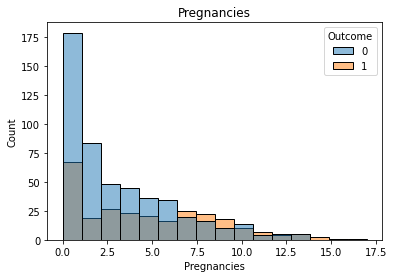

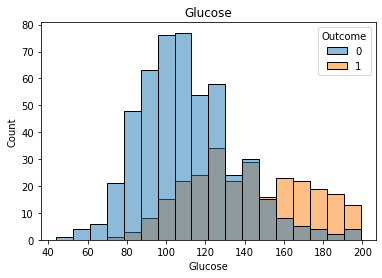

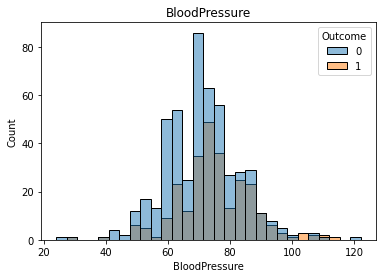

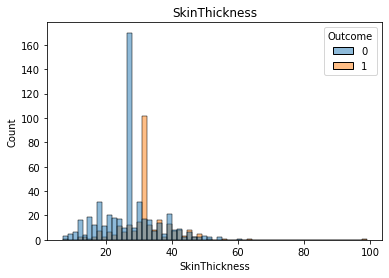

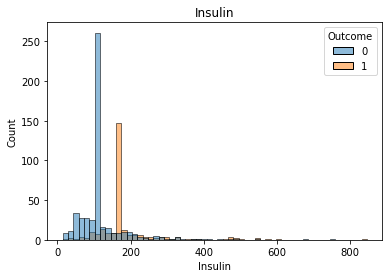

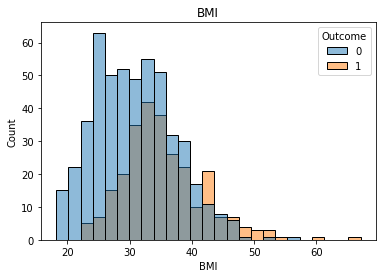

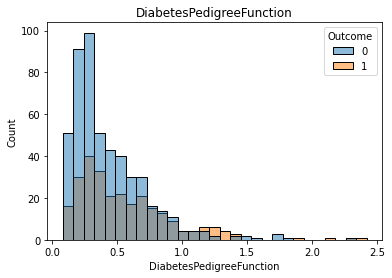

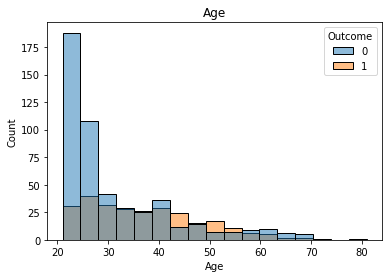

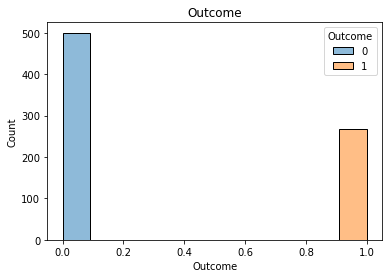

C:\Users\masud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

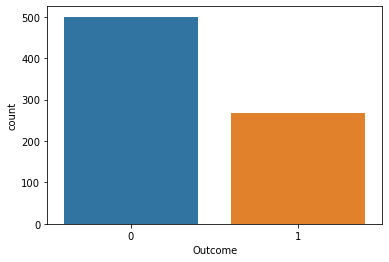

In [13]:
for i in data.columns:
    sns.histplot(x=i, hue= 'Outcome', data=data)
    plt.title(i)
    plt.show()
    
sns.countplot(data['Outcome'])

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

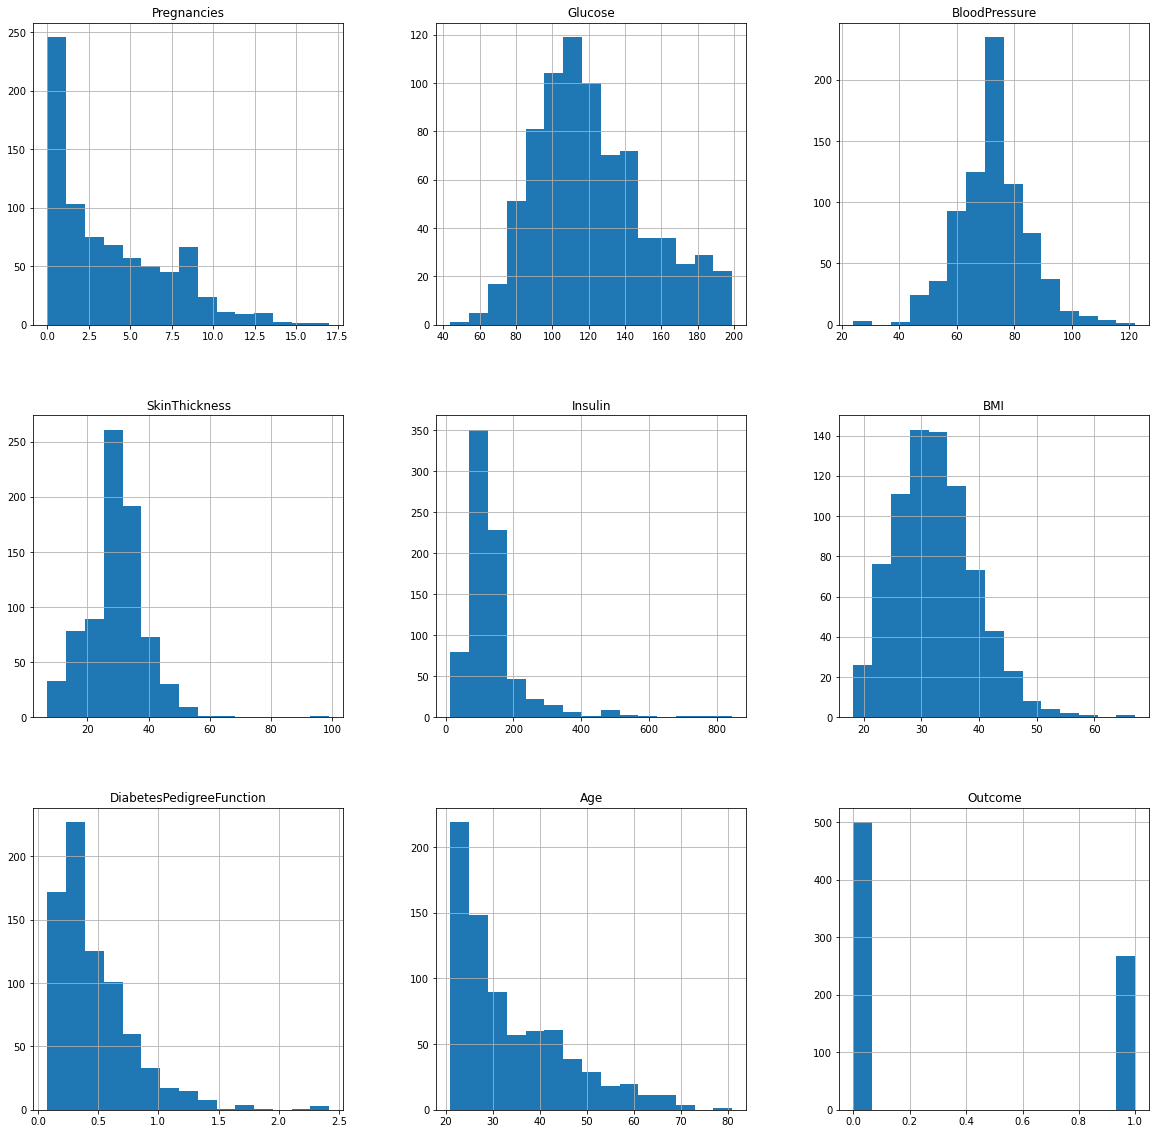

In [14]:
data.hist(bins=15,figsize=(20,20))

## Logistic Regression

In [15]:
# Split the data into training set and testing set using train_test_split.
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
logmodel = LogisticRegression()

In [19]:
logmodel.fit(X_train, y_train)

C:\Users\masud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions

In [20]:
predictions = logmodel.predict(X_test)

In [21]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[132  28]
 [ 28  43]]


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       160
           1       0.61      0.61      0.61        71

    accuracy                           0.76       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.76      0.76      0.76       231



In [22]:
roc_auc_score(y_test, logmodel.predict_proba(X_test)[:, 1])

0.8169894366197183

It tells us that we have a 81.69% chance of selecting a positive instance.

In [24]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
acc_logmodel_train = round(logmodel.score(X_train, y_train)*100, 2)
acc_logmodel_test = round(logmodel.score(X_test, y_test)*100, 2)
print("Logistic Regression Train Accuracy: %", acc_logmodel_train)
print("Logistic Regression Test Accuracy: %", acc_logmodel_test)

Logistic Regression Train Accuracy: % 78.58
Logistic Regression Test Accuracy: % 75.76


C:\Users\masud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Logistic Regression Train Accuracy: % 78.58**

**Logistic Regression Test Accuracy: % 75.76**